Bonjour à tous ici démarre mon projet d'analyse d'un dataset d'animés dans le but d'améliorer le catalogue pour une plateforme de streaming d'animés et d'en déterminer les meilleurs animés à mettre en avant grâce à un score final pertinent.

je commence par installer les dépendances présentes dans le readme

1- préparation de l'environnement

je vais d'abord commencer par charger le csv et importer le module panda car elle permet d'avoir des types de variables différents contrairement à numpy (qu'on va quand meme importer pour des calculs ) par exemple.
Ainsi que matpotlib afin de générer des graphiques plus tard. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#lecture du csv 
df = pd.read_csv('animes.csv')

# Configuration pour des graphiques stylés
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

# j'affiche nombre de lignes et colonnes et lecture des 5 1ere lignes
print(df.shape)
display(df.head())

(61, 17)


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


Maintenant l'idée c'est d'identifier les problèmes dans les données présente 
nottament la présence de doublons  et de colonnes non pertinent pour le moment comme celle ci car  elles sont plus qualitatives que quantitatives et l'analyse se veut principalement quantitative (ces données pourraient etre utiles dans le cadre d'un autre projet où on fait une vraie analyse sémantique pour classer les animés selon le champ lexical auquel il renvoie (dégout, excitation, hype émotions etc)

 Meilleur_Ep_Titre, Comm_Meilleur_Ep,

Pire_Ep_Titre, Comm_Pire_Ep,

Comm_Saison_1, Comm_Saison_2, Comm_Saison_3

In [2]:

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              61 non-null     str    
 1   Genre_Tags         61 non-null     str    
 2   Source             61 non-null     str    
 3   Nb_Episodes        61 non-null     int64  
 4   Status             61 non-null     str    
 5   Studio             61 non-null     str    
 6   Date_Pub           61 non-null     str    
 7   Note_Globale       61 non-null     float64
 8   Note_Meilleur_Ep   61 non-null     float64
 9   Meilleur_Ep_Titre  61 non-null     str    
 10  Comm_Meilleur_Ep   61 non-null     str    
 11  Note_Pire_Ep       61 non-null     float64
 12  Pire_Ep_Titre      61 non-null     str    
 13  Comm_Pire_Ep       61 non-null     str    
 14  Comm_Saison_1      61 non-null     str    
 15  Comm_Saison_2      61 non-null     str    
 16  Comm_Saison_3      51 non-null     str 

,Nb_Episodes,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep
count,61.000000,61.000000,61.000000,61.000000
mean,90.737705,8.316393,9.318033,6.719672
std,162.055227,0.521594,0.469932,1.369650
min,3.000000,6.000000,8.200000,0.000000
25%,24.000000,8.100000,9.100000,6.200000
50%,37.000000,8.400000,9.400000,7.200000
75%,76.000000,8.600000,9.700000,7.500000
max,1090.000000,9.300000,9.900000,8.400000


grace à description on voit que les dates de publication sont en string et non en format date time on va donc y remedier
On observe donc que l'écart type des notes globales est très faible les notes sont généralement entre 8 et 9 les données sont homogenes car les animés présents dans cette liste sont déjà la crème de la crème, la valeur de la note pire épisode de medalist à 0 fait tire la moyenne des pires notes vers le bas 

In [3]:
# On crée la copie d'abord
df_clean = df.copy()

# Ensuite on applique la modification
df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].replace(0, df_clean['Note_Pire_Ep'].median())

#je fais en sorte que medalist ne soit pas pris en compte pour le calcul de la pire note
# On traite le 0.0 de Medalist pour ne pas fausser l'écart
df_clean['Note_Pire_Ep'] = df_clean['Note_Pire_Ep'].replace(0, df_clean['Note_Pire_Ep'].median())

#changement du type des dates de publication de string à objet date
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])

#je vérifie avec 
df.info()

#maintenant je fais en sorte de n'avoir que l'année
df['Date_Pub'] = df['Date_Pub'].dt.year

#nb: note réalisée plus tard que le reste du code: pour des soucis de modification je me suis rendu compte tardivement que le nom devrais changer et ne plus etre dat_pub mais par exemple annee_pub

#on regarde le nombre de valeur manquantes par colonnes
df.isna().sum()
#ainsi que le nombre de doublons
df.duplicated().sum()

<class 'pandas.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Anime              61 non-null     str           
 1   Genre_Tags         61 non-null     str           
 2   Source             61 non-null     str           
 3   Nb_Episodes        61 non-null     int64         
 4   Status             61 non-null     str           
 5   Studio             61 non-null     str           
 6   Date_Pub           61 non-null     datetime64[us]
 7   Note_Globale       61 non-null     float64       
 8   Note_Meilleur_Ep   61 non-null     float64       
 9   Meilleur_Ep_Titre  61 non-null     str           
 10  Comm_Meilleur_Ep   61 non-null     str           
 11  Note_Pire_Ep       61 non-null     float64       
 12  Pire_Ep_Titre      61 non-null     str           
 13  Comm_Pire_Ep       61 non-null     str           
 14  Comm_Saison_1      61 n

np.int64(2)

In [4]:
# on voit qu'il y avait une ligne en doublon on la supprime avec:
df.drop_duplicates()

#tout ca nous confirme qu'il fallait enlever ces deux colonnes (elles sont parmis celle que j'avais prévu d'enlever)
df_clean = df.drop(columns=["Meilleur_Ep_Titre", "Comm_Meilleur_Ep", "Pire_Ep_Titre", "Comm_Pire_Ep", "Comm_Saison_1", "Comm_Saison_2", "Comm_Saison_3"])

# on vérifie qu'elles ont bien été enlevées
print(df_clean.columns)

Index(['Anime', 'Genre_Tags', 'Source', 'Nb_Episodes', 'Status', 'Studio',
       'Date_Pub', 'Note_Globale', 'Note_Meilleur_Ep', 'Note_Pire_Ep'],
      dtype='str')


Je veux voir si il y a une corrélation entre l'année de sortie des animés et la moyenne des  notes des animés

In [5]:
# je trie par années de sortie puis par moyenne les animés de facon croissante
df_sorted = df_clean.sort_values(by=['Date_Pub', 'Note_Globale'], ascending=[True, True])

# Afficher les premières lignes pour vérifier
print(df_sorted.head())

#maintenant on calcules le coefficient de corrélation de Pearson
correlation = df_clean['Date_Pub'].corr(df_clean['Note_Globale'])

print(f"La corrélation entre l'année et la note est de : {correlation:.2f}")

                  Anime             Genre_Tags    Source  Nb_Episodes Status  \
2         Dragon Ball Z        Action / Shonen     Manga          291   Fini   
47        Yū Yū Hakusho  Action / Supernatural     Manga          112   Fini   
46  Kenshin le Vagabond    Action / Historical     Manga           95   Fini   
1                Trigun        Sci-Fi / Action     Manga           26   Fini   
4          Cowboy Bebop          Sci-Fi / Noir  Original           26   Fini   

                  Studio  Date_Pub  Note_Globale  Note_Meilleur_Ep  \
2         Toei Animation      1989           8.7               9.4   
47        Studio Pierrot      1992           8.5               9.1   
46  Studio Gallop / Deen      1996           8.3               9.0   
1               Madhouse      1998           8.2               9.1   
4                Sunrise      1998           8.8               9.7   

    Note_Pire_Ep  
2            5.9  
47           7.3  
46           6.2  
1            6.5  
4  

je veux en faire un graph pour qu'on visualise mieux cette non corrélation 

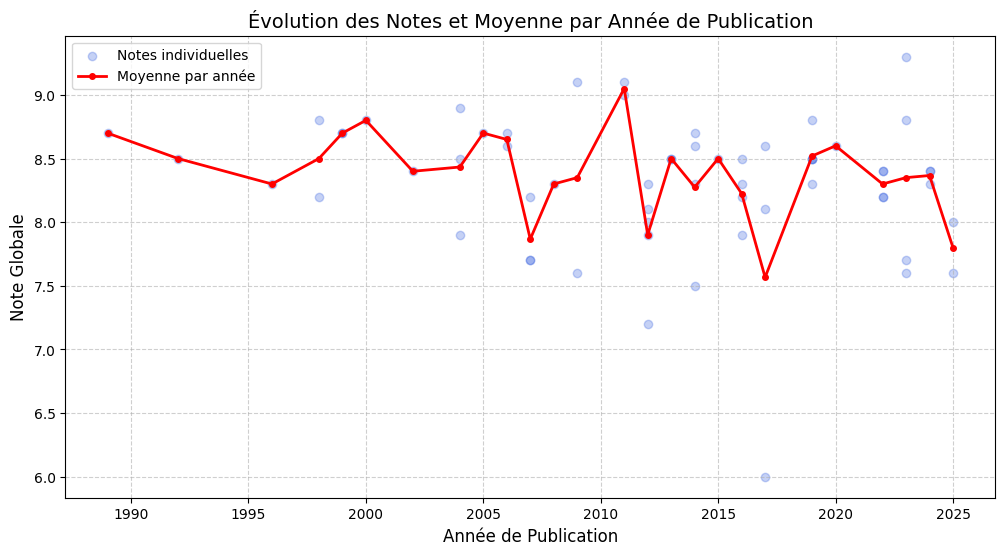

In [6]:
# 1. Calcul de la moyenne par année (nécessaire pour la ligne)
moyenne_par_an = df_clean.groupby('Date_Pub')['Note_Globale'].mean()

# Configuration de la taille du graphique
plt.figure(figsize=(12, 6))

# 2. Création du nuage de points (on baisse un peu l'alpha à 0.3 pour mieux voir la ligne)
plt.scatter(df_clean['Date_Pub'], df_clean['Note_Globale'], 
            color='royalblue', alpha=0.3, label='Notes individuelles')

# 3. Ajout de la ligne de moyenne annuelle
plt.plot(moyenne_par_an.index, moyenne_par_an.values, 
         color='red', marker='o', markersize=4, linewidth=2, label='Moyenne par année')

# 4. Ajout des éléments de texte
plt.title('Évolution des Notes et Moyenne par Année de Publication', fontsize=14)
plt.xlabel('Année de Publication', fontsize=12)
plt.ylabel('Note Globale', fontsize=12)

# 5. Amélioration visuelle
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend() # Ajoute une légende pour distinguer les points de la ligne

# 6. Affichage du graphique
plt.show()

On voit bien que l'hypothèse d'un lien entre l'année de publication est fausse

Mais du coup dans le meme style je me pose la question suivante est ce qu'on peut identifier des studios qui sortent du lot et dont on sais qu'ils ont plus de chances de sortir un animé de qualité.

dans ce but je vais faire un comparatif avec des courbes sur les notes globales moyenne par studio, pour se faire on va les grouper les animes par studio (qui ont minimum 2 animés) et calculer la moyenne de leurs notes.

In [7]:
# Groupement par studio pour calculer la moyenne et le nombre d'animés
stats_studios = df_clean.groupby('Studio')['Note_Globale'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# On affiche les 10 meilleurs studios (avec au moins une œuvre)
print("Top des studios par note moyenne :")
display(stats_studios.head(10))

Top des studios par note moyenne :


,mean,count
Studio,,
OLM,8.80,1
Sunrise,8.75,2
Artland,8.70,1
Toei Animation,8.70,2
White Fox,8.65,2
Kinema Citrus,8.60,1
Wit Studio / MAPPA,8.60,3
CloverWorks,8.50,1
Ufotable,8.50,2


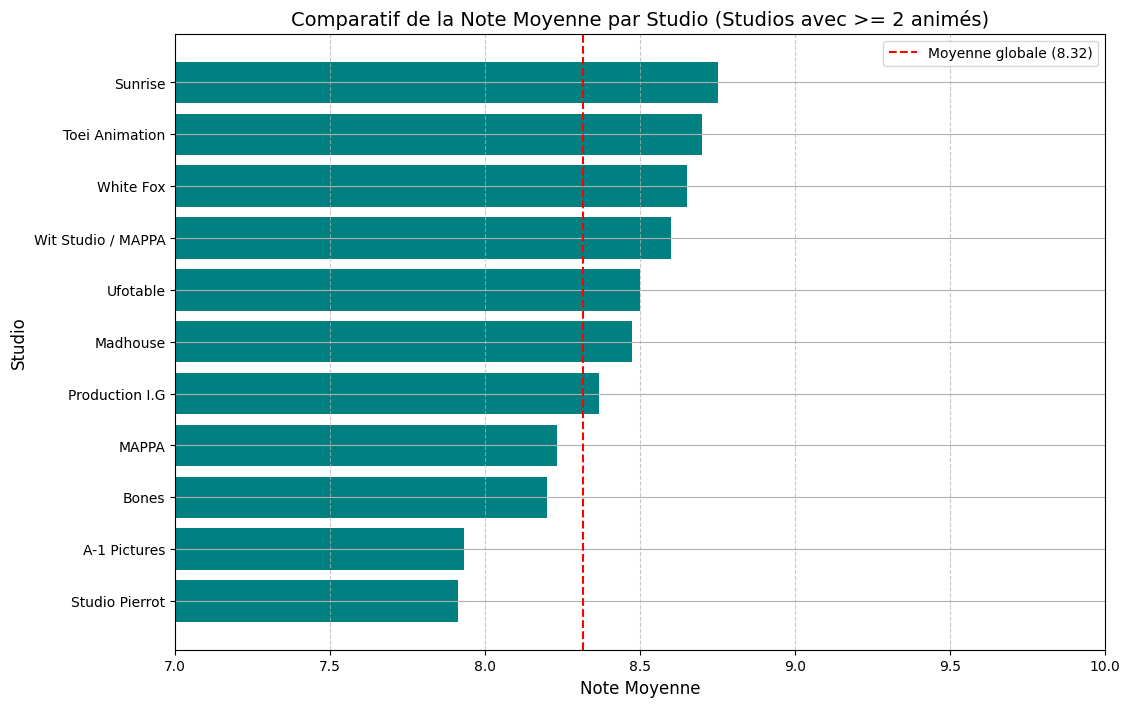

In [8]:
import matplotlib.pyplot as plt

# cette fois ci On ne garde que les studios qui ont au moins 2 animés pour avoir une moyenne représentative
top_studios = stats_studios[stats_studios['count'] >= 2].sort_values(by='mean', ascending=True)

# Création du graphique
plt.figure(figsize=(12, 8))
plt.barh(top_studios.index, top_studios['mean'], color='teal')

# Ajout d'une ligne verticale pour la moyenne globale de tout le dataset
moyenne_totale = df_clean['Note_Globale'].mean()
plt.axvline(moyenne_totale, color='red', linestyle='--', label=f'Moyenne globale ({moyenne_totale:.2f})')

plt.title('Comparatif de la Note Moyenne par Studio (Studios avec >= 2 animés)', fontsize=14)
plt.xlabel('Note Moyenne', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.xlim(7, 10) # On zoome sur la zone pertinente des notes
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

ces données ne sont pas concluantes mais ça valais le coup de faire le test pour mettre de coté cette hypothèse de studios générateurs de chef d'oeuvre (car ils font trop peus d'animes pour ça)

du coup je vais me reconcentrer sur mon objectif et calculer l'écart des notes pour mieux calculer la regularité comme ça dans mon score final on recompensera les animes réguliers.

un animé réussi est un animé régulier, pas un animé où a l'impresion de jouer à la roulette russe et de tomber soit sur un chef d'oeuvre soit sur un purge de 20 minutes.

Pour moi un animé ne se résume pas à sa longueur et elle n'influence pas autnat que d'autres personnes le pense, mais je dois rester honnete et d'un point de vue mathématique elle reste un facteur qui influence le rythme la régularité donc la qualité et donc le calcul de la régularité, c'est plus dur de faire un animé long en gardant la qualité donc il faute le valoriser.

voici pourquoi ma note finale est un agrégat de la régularité, la note globale let la longueur (sous formes de score qui vont pondérer le score final) 

on calcule l'écart car plus il est élevé moins l'animé est régulier, régularité qui se modelise par le calcul suivant : Regularite = 10 - Ecart car on est en base 10 et que plus il est élevé moins l'animé est régulier

Le coéfficient sera donc de 0.4 pour la regularité ainsi que la note globale car ils sont tout les deux aussi importants et 0.2 pour le score de longueur.

In [9]:
# on  calcule l'écart puis le score de régularité
df_clean['Ecart'] = df_clean['Note_Meilleur_Ep'] - df_clean['Note_Pire_Ep']
df_clean['Score_Regularite'] = 10 - df_clean['Ecart']

# Score Longueur log-normalisé (sur 10 pour que ce soit cohérent avec le reste des notations)
df_clean['Score_Longueur'] = (np.log10(df_clean['Nb_Episodes']) / np.log10(500)) * 10
df_clean['Score_Longueur'] = df_clean['Score_Longueur'].round(1)
df_clean.head()

#on calcule maintenant le score final

df_clean['Score_Final'] = (
    df_clean['Note_Globale'] * 0.4 + 
    df_clean['Score_Regularite'] * 0.4 + 
    df_clean['Score_Longueur'] * 0.2
)

# On trie le tableau pour voir les meileurs animés
df_final = df_clean.sort_values(by='Score_Final', ascending=False)

# On affiche les 10 meilleurs
df_final[['Anime', 'Score_Final', 'Note_Globale', 'Score_Regularite', 'Score_Longueur']].head(10)



,Anime,Score_Final,Note_Globale,Score_Regularite,Score_Longueur
44,Monster,8.26,8.9,8.3,6.9
45,Hajime no Ippo,8.24,8.8,8.3,7.0
47,Yū Yū Hakusho,8.20,8.5,8.2,7.6
53,Vinland Saga,8.16,8.8,8.5,6.2
8,One Piece,8.06,8.7,5.8,11.3
43,Your Lie in April,8.00,8.6,8.9,5.0
56,SPY×FAMILY,8.00,8.4,8.7,5.8
22,GTO,7.98,8.7,8.2,6.1
35,Frieren: Beyond Journey's End,7.96,9.3,7.9,5.4
31,Mushishi,7.96,8.7,8.6,5.2


On va représenter ces scores sous formes de 2 graphiques afin de mieux representer la différence entre les 2 animés, puis la part que chaque critère occupe dans la note finale

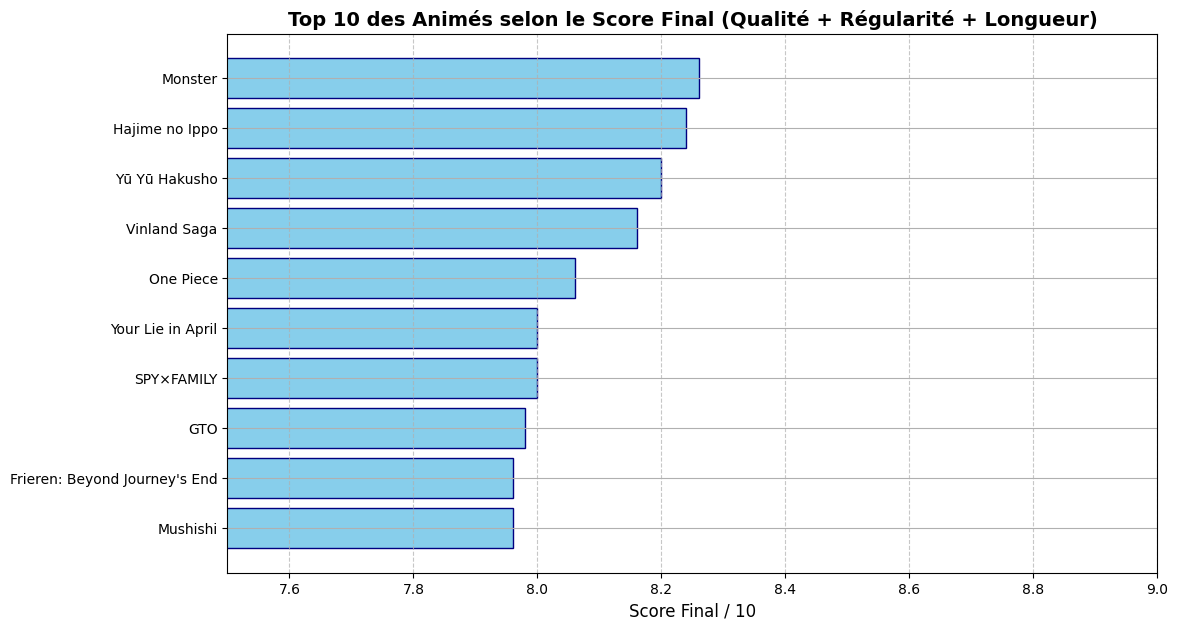

In [10]:
#Le classement final (affiché sous forme de barreshHorizontales)

# On récupère les 10 meilleurs
top_10 = df_clean.sort_values(by='Score_Final', ascending=False).head(10)

#on paramètre le graphique
plt.figure(figsize=(12, 7))
plt.barh(top_10['Anime'][::-1], top_10['Score_Final'][::-1], color='skyblue', edgecolor='navy')
plt.title('Top 10 des Animés selon le Score Final (Qualité + Régularité + Longueur)', fontsize=14, fontweight='bold')
plt.xlabel('Score Final / 10', fontsize=12)
plt.xlim(7.5, 9)  # On zoome pour mieux voir les écarts
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



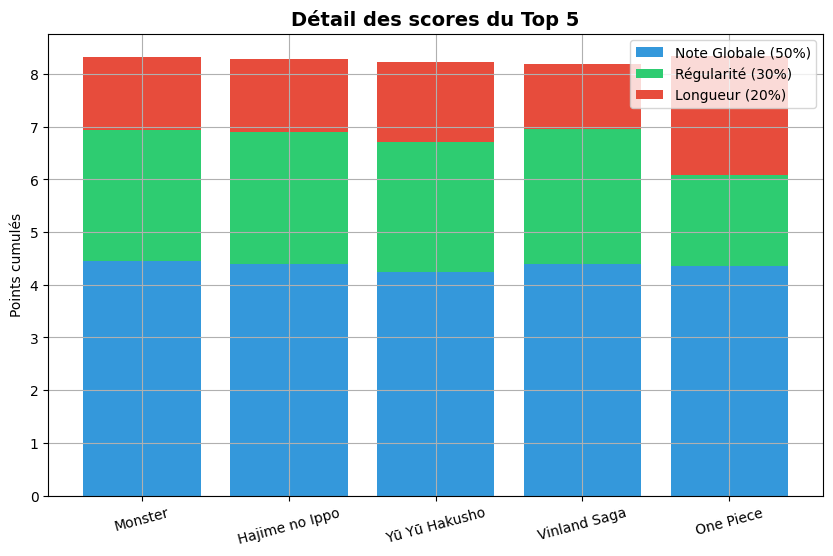

In [11]:
top_5 = df_clean.sort_values(by='Score_Final', ascending=False).head(5)

# On calcule les contributions réelles (coefficients appliqués)
part_note = top_5['Note_Globale'] * 0.5
part_reg = top_5['Score_Regularite'] * 0.3
part_long = top_5['Score_Longueur'] * 0.2

plt.figure(figsize=(10, 6))
labels = top_5['Anime']
plt.bar(labels, part_note, label='Note Globale (50%)', color='#3498db')
plt.bar(labels, part_reg, bottom=part_note, label='Régularité (30%)', color='#2ecc71')
plt.bar(labels, part_long, bottom=part_note + part_reg, label='Longueur (20%)', color='#e74c3c')

plt.title('Détail des scores du Top 5', fontsize=14, fontweight='bold')
plt.ylabel('Points cumulés')
plt.legend()
plt.xticks(rotation=15)
plt.show()

à l'aide de notre score final on constate que le meilleur animé est Monster il est donc jugé comme le plus polyvalent en termes de regularité et qualité. On constate également que ce qui lui a permis de se démarquer c'est surtout sa regularité

Le top 3 du classement est on voit donc qu'il ne faut pas arrondir le score final à la première décimale

je peux donc maintenant export le csv trié, et en ajoutant 1 à l'index pour qu'il paraisse naturel en commencant par 1 comme un vrai classement (dans la colonne rang)

In [12]:
#On trie par score (du plus haut au plus bas)
df_final = df_clean.sort_values(by='Score_Final', ascending=False)

#On remet l'index à zéro
df_final = df_final.reset_index(drop=True)

# On décale tout l'index de +1 pour que soit naturel et lisible
df_final.index = df_final.index + 1

#On nomme l'index "Rang" dans ce meme but
df_final.index.name = 'Rang'

#toujours pareil
df_final = df_final.round(2)

# On affiche le résultat arrond à 2 chiffres après la virgule 
display(df_final.head(10))

# maintenant on exporte
df_final.to_csv('dataset_trié_cleané.csv', index=True)

,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Note_Pire_Ep,Ecart,Score_Regularite,Score_Longueur,Score_Final
Rang,,,,,,,,,,,,,,
1,Monster,Thriller / Mystery,Manga,74,Fini,Madhouse,2004,8.9,9.1,7.4,1.7,8.3,6.9,8.26
2,Hajime no Ippo,Sport / Boxing,Manga,76,Fini,Madhouse,2000,8.8,9.2,7.5,1.7,8.3,7.0,8.24
3,Yū Yū Hakusho,Action / Supernatural,Manga,112,Fini,Studio Pierrot,1992,8.5,9.1,7.3,1.8,8.2,7.6,8.20
4,Vinland Saga,Adventure / Drama,Manga,48,En cours,Wit Studio / MAPPA,2019,8.8,8.9,7.4,1.5,8.5,6.2,8.16
5,One Piece,Adventure / Shonen,Manga,1090,En cours,Toei Animation,1999,8.7,9.8,5.6,4.2,5.8,11.3,8.06
6,Your Lie in April,Drama / Music,Manga,22,Fini,A-1 Pictures,2014,8.6,9.5,8.4,1.1,8.9,5.0,8.00
7,SPY×FAMILY,Comedy / Slice of Life,Manga,37,En cours,Wit / CloverWorks,2022,8.4,9.1,7.8,1.3,8.7,5.8,8.00
8,GTO,Comedy / Slice of Life,Manga,43,Fini,Studio Pierrot,1999,8.7,9.2,7.4,1.8,8.2,6.1,7.98
9,Frieren: Beyond Journey's End,Adventure / Fantasy,Manga,28,En cours,Madhouse,2023,9.3,9.4,7.3,2.1,7.9,5.4,7.96


En conclusion on voit que la note globale ne suffit pas pour avoir un indicateur plus pertinant de qualité d'un animé elle doit etre complété avec la régularité ainsi que la longévité (c'est pour ça que one piece c'est exceptionnel).

Ce qui nous permet d'dentifier les titres à mettre en avant dans le catalogue pour garantir la satisfaction des utilisateurs